In [36]:
import pandas as pd
df=pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
0,41.0,41.00000,190.0,190.000000,7.4,67,0
1,36.0,36.00000,118.0,118.000000,8.0,72,0
2,12.0,12.00000,149.0,149.000000,12.6,74,0
3,18.0,18.00000,313.0,313.000000,11.5,62,0
4,NaN,42.12931,NaN,185.931507,14.3,56,1


In [37]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Unnamed: 2', 'Solar.R', 'Wind', 'Temp',
       'result'],
      dtype='object')

In [38]:
df.shape

(153, 7)

In [39]:
df.describe()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
count,116.000000,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,42.129310,185.931507,185.931507,9.957516,77.882353,0.529412
std,32.987885,28.693372,90.058422,87.960267,3.523001,9.465270,0.500773
min,1.000000,1.000000,7.000000,7.000000,1.700000,56.000000,0.000000
25%,18.000000,21.000000,115.750000,120.000000,7.400000,72.000000,0.000000
50%,31.500000,42.129310,205.000000,194.000000,9.700000,79.000000,1.000000
75%,63.250000,46.000000,258.750000,256.000000,11.500000,85.000000,1.000000
max,168.000000,168.000000,334.000000,334.000000,20.700000,97.000000,1.000000


In [40]:
df.groupby('result').mean()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp
result,,,,,,
0,20.902778,20.902778,165.449275,166.302702,11.270833,72.652778
1,76.863636,60.997339,204.285714,203.379334,8.790123,82.530864


In [41]:
df['result'].value_counts()

1    81
0    72
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

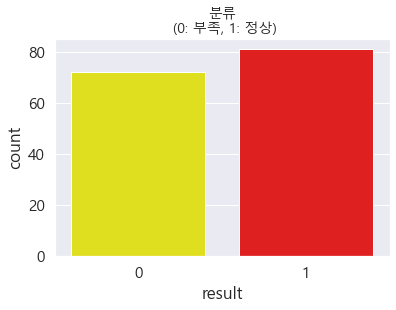

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors=["yellow","red"]
sns.countplot('result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)',fontsize=14)


In [43]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['result']

ValueError: 'c' argument has 153 elements, which is inconsistent with 'x' and 'y' with size 116.

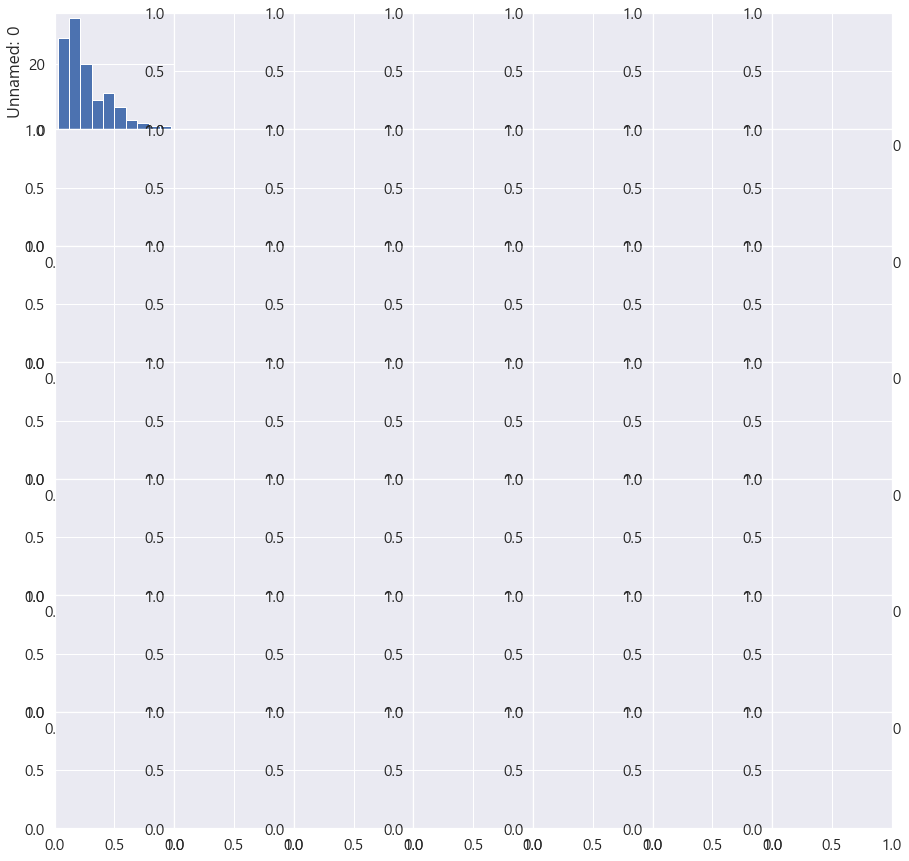

In [44]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)

In [45]:
from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [46]:
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [47]:
df_samp["result"].value_counts()

0    81
1    81
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

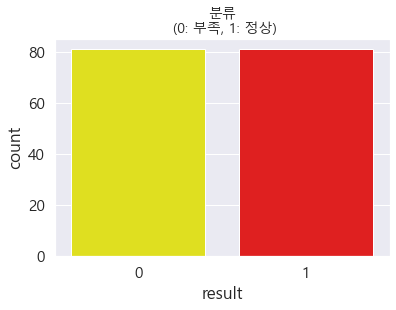

In [48]:
colors=["yellow","red"]
sns.countplot('result',data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)',fontsize=14)

In [49]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['result']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(random_state=42)
model.fit(X_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [52]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test,y_test))
print("검증용:",np.mean(pred == y_test))

학습용: 0.7213114754098361
검증용: 0.6451612903225806
검증용: 0.6451612903225806


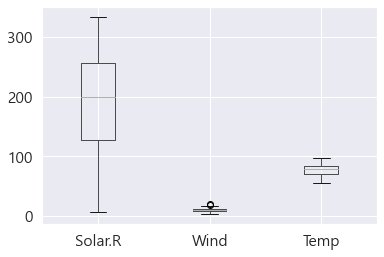

In [53]:
X_train.boxplot()
plt.show()

In [54]:
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_test - min_on_training)/range_on_training
x_test_scaled=(X_test - min_on_training)/range_on_training
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R    0.021407
Wind      -0.063584
Temp       0.024390
dtype: float64
특성별 최대값
Solar.R    0.957187
Wind       1.034682
Temp       0.926829
dtype: float64


In [55]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_test - mean_on_train)/ std_on_train
X_test_scaled=(X_test - mean_on_train)/ std_on_train
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R   -1.966913
Wind      -2.570875
Temp      -2.095166
dtype: float64
특성별 최대값
Solar.R    1.506596
Wind       3.240230
Temp       1.683332
dtype: float64


C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


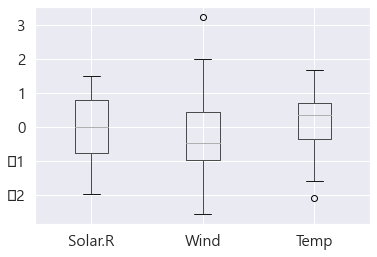

In [56]:
X_train_scaled.boxplot()
plt.show()

In [62]:
model = MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [31, 122]

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
cm

array([[ 6,  9],
       [ 2, 14]], dtype=int64)

In [60]:
df_cm=pd.DataFrame(cm, index=[0, 1],
columns=[0, 1])
df_cm

,0,1
0,6,9
1,2,14


<AxesSubplot:title={'center':'Confusion Matrix'}>

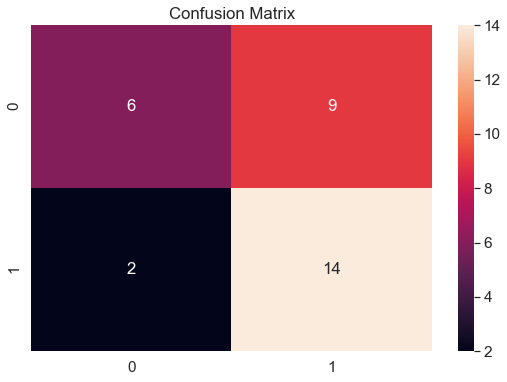

In [61]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)